# Autism Spectrum Disorder (ASD) Screening – Data Wrangling & EDA

This notebook focuses on cleaning the dataset, handling missing values, exploring distributions, and identifying potential data leakage before modeling.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu 

# Import Dataset

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
autistic_spectrum_disorder_screening_data_for_children = fetch_ucirepo(id=419) 
  
# data (as pandas dataframes) 
X = autistic_spectrum_disorder_screening_data_for_children.data.features 
y = autistic_spectrum_disorder_screening_data_for_children.data.targets 
  
# metadata 
print(autistic_spectrum_disorder_screening_data_for_children.metadata) 
  
# variable information 
print(autistic_spectrum_disorder_screening_data_for_children.variables) 


{'uci_id': 419, 'name': 'Autistic Spectrum Disorder Screening Data for Children  ', 'repository_url': 'https://archive.ics.uci.edu/dataset/419/autistic+spectrum+disorder+screening+data+for+children', 'data_url': 'https://archive.ics.uci.edu/static/public/419/data.csv', 'abstract': 'Children screening data for autism suitable for classification and predictive tasks ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 292, 'num_features': 20, 'feature_types': ['Integer'], 'demographics': ['\x00', 'Age', 'Gender', 'Ethnicity', 'Nationality'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5659W', 'creators': ['Fadi Thabtah'], 'intro_paper': None, 'additional_info': {'summary': "see attached file for variables' description ", 'purpose': None, 'funded_by': None, 'instances_repr

# Data Wrangling

In [3]:
# Merge X and y into one dataframe
df = pd.concat([X, y], axis=1)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [4]:
df.shape

(292, 21)

In [5]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        249 non-null    object 
 13  jaundice         292 non-null    object 
 14  autism           292 non-null    object 
 15  country_of_res   292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          

In [4]:
# Drop redundant features
cols_to_drop = ['age_desc', 'relation', 'used_app_before', 'country_of_res', 'ethnicity']

df.drop(columns=cols_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   292 non-null    int64  
 1   A2_Score   292 non-null    int64  
 2   A3_Score   292 non-null    int64  
 3   A4_Score   292 non-null    int64  
 4   A5_Score   292 non-null    int64  
 5   A6_Score   292 non-null    int64  
 6   A7_Score   292 non-null    int64  
 7   A8_Score   292 non-null    int64  
 8   A9_Score   292 non-null    int64  
 9   A10_Score  292 non-null    int64  
 10  age        288 non-null    float64
 11  gender     292 non-null    object 
 12  jaundice   292 non-null    object 
 13  autism     292 non-null    object 
 14  result     292 non-null    int64  
 15  class      292 non-null    object 
dtypes: float64(1), int64(11), object(4)
memory usage: 36.6+ KB


In [21]:
# Check for missing values
df.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          4
gender       0
jaundice     0
autism       0
result       0
class        0
dtype: int64

In [5]:
# Replace missing age values with the mean age
df['age'] = df['age'].fillna(df['age'].mean())

df.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          0
gender       0
jaundice     0
autism       0
result       0
class        0
dtype: int64

In [23]:
for col in df.columns:
    print(col, df[col].unique())
    print('\n')

A1_Score [1 0]


A2_Score [1 0]


A3_Score [0 1]


A4_Score [0 1]


A5_Score [1 0]


A6_Score [1 0]


A7_Score [0 1]


A8_Score [1 0]


A9_Score [0 1]


A10_Score [0 1]


age [ 6.          5.          4.         11.         10.          8.
  7.          9.          6.35416667]


gender ['m' 'f']


jaundice ['no' 'yes']


autism ['no' 'yes']


result [ 5  4 10  7  8  3  9  2  1  6  0]


class ['NO' 'YES']




In [6]:
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   A1_Score   292 non-null    int64 
 1   A2_Score   292 non-null    int64 
 2   A3_Score   292 non-null    int64 
 3   A4_Score   292 non-null    int64 
 4   A5_Score   292 non-null    int64 
 5   A6_Score   292 non-null    int64 
 6   A7_Score   292 non-null    int64 
 7   A8_Score   292 non-null    int64 
 8   A9_Score   292 non-null    int64 
 9   A10_Score  292 non-null    int64 
 10  age        292 non-null    int64 
 11  gender     292 non-null    object
 12  jaundice   292 non-null    object
 13  autism     292 non-null    object
 14  result     292 non-null    int64 
 15  class      292 non-null    object
dtypes: int64(12), object(4)
memory usage: 36.6+ KB


In [25]:
df['age'].unique()

array([ 6,  5,  4, 11, 10,  8,  7,  9])

# Exploratory Data Analysis

<Axes: xlabel='result', ylabel='Count'>

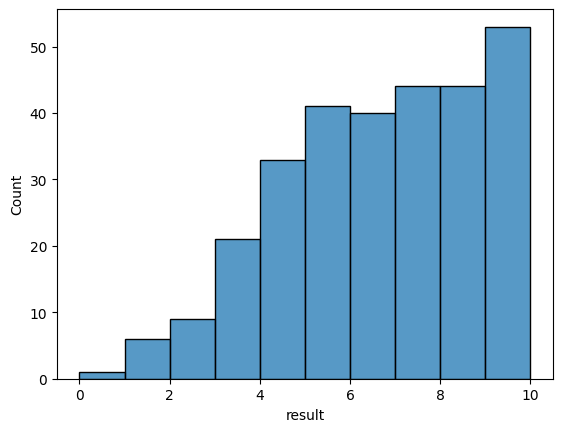

In [28]:
# Distribution of Screening Scores
sns.histplot(df['result'], bins=10)

<Axes: xlabel='result', ylabel='Count'>

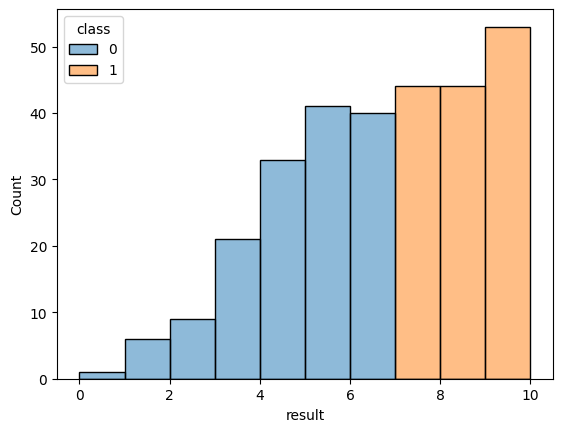

In [52]:
sns.histplot(data=df, x="result", hue="class", bins=10)

<Axes: xlabel='class', ylabel='result'>

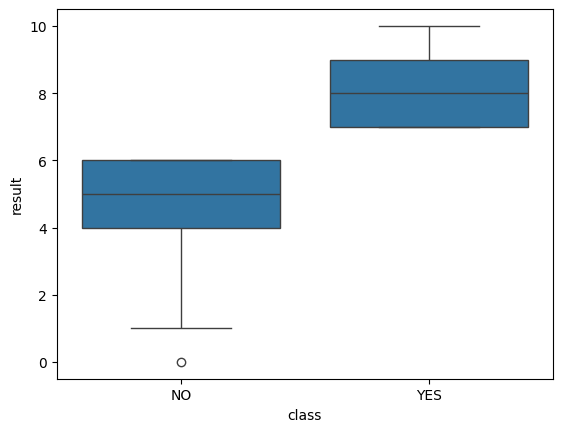

In [29]:
# Total Screening Score vs Class
sns.boxplot(x='class', y='result', data=df)

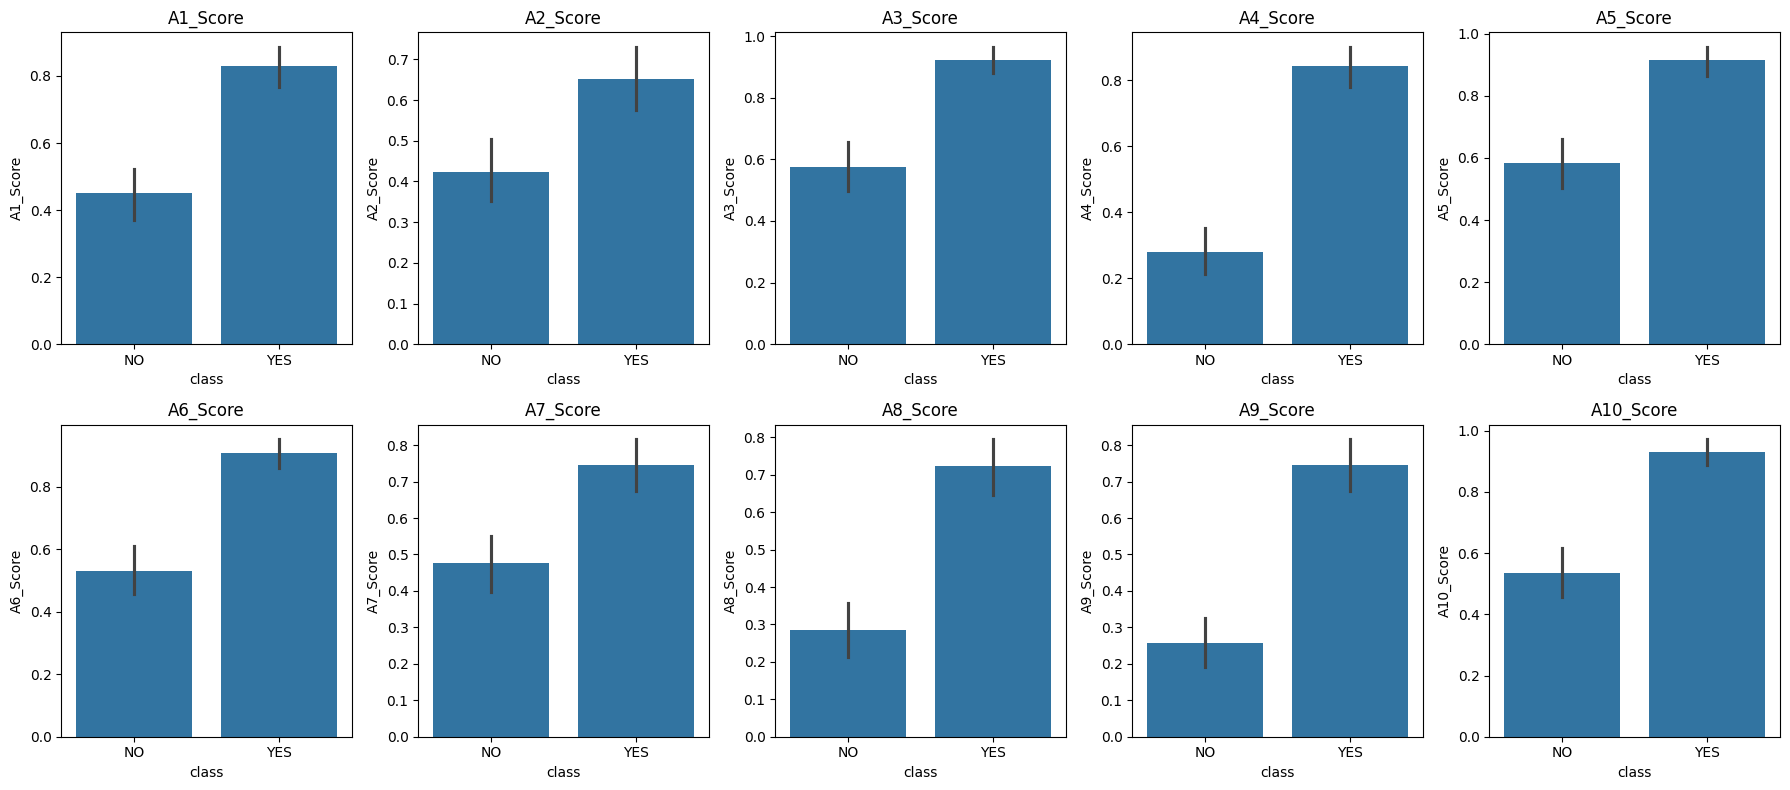

In [31]:
# Relationship between individual screening scores and the class
scores = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

n_cols = 5
n_rows = (len(scores) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(scores, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.barplot(x='class', y=df[col], data=df)
    plt.title(col)

plt.tight_layout()
plt.show()

Medical Risk Factors vs Class

<Axes: xlabel='jaundice', ylabel='count'>

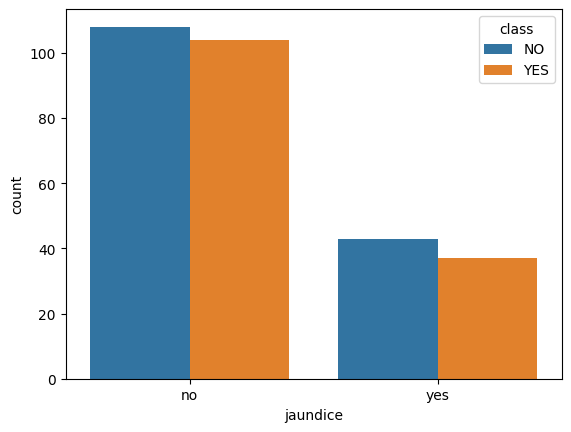

In [32]:
# Jaundice vs Class
sns.countplot(x='jaundice', hue='class', data=df)

<Axes: xlabel='autism', ylabel='count'>

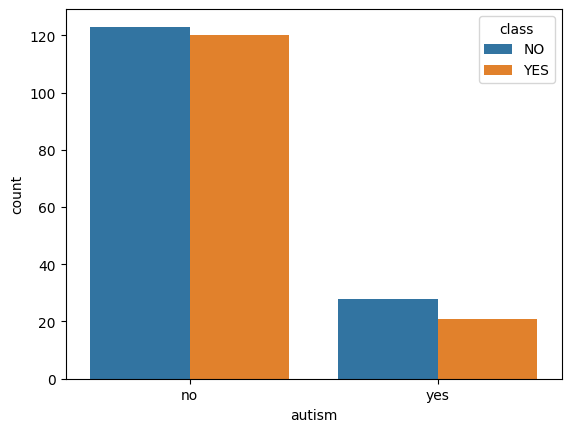

In [33]:
# Family History of Autism vs Class
sns.countplot(x='autism', hue='class', data=df)

<Axes: xlabel='gender', ylabel='count'>

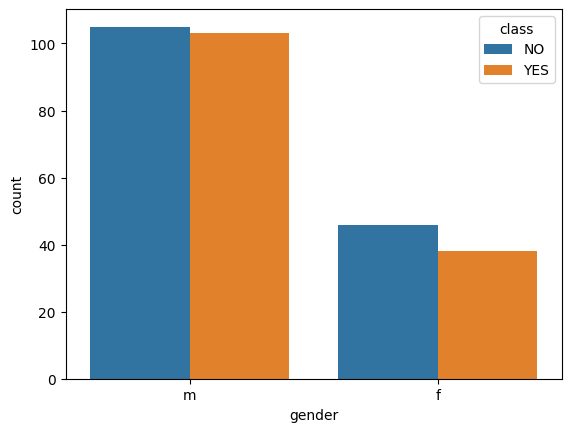

In [34]:
# Gender vs Class
sns.countplot(x='gender', hue='class', data=df)

<Axes: xlabel='class', ylabel='age'>

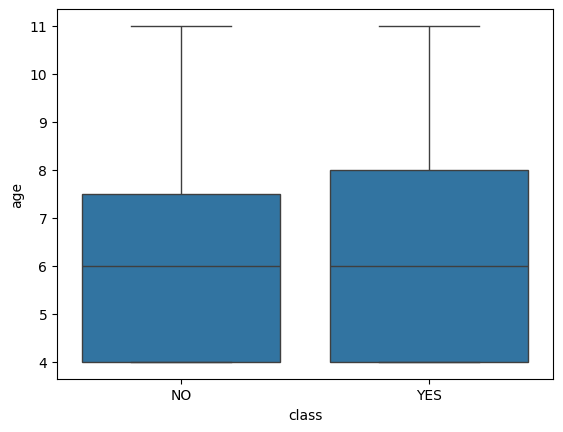

In [35]:
# Age vs Class
sns.boxplot(x='class', y='age', data=df)

In [37]:
# Class Distribution
print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

class
NO     151
YES    141
Name: count, dtype: int64


class
NO     0.517123
YES    0.482877
Name: proportion, dtype: float64


# Data Preprocessing

In [7]:
df['gender'] = df['gender'].map({'m': 1, 'f':0})
df['jaundice'] = df['jaundice'].map({'no': 0, 'yes': 1})
df['autism'] = df['autism'].map({'no': 0, 'yes': 1})
df['class'] = df['class'].map({'NO': 0, 'YES': 1})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   A1_Score   292 non-null    int64
 1   A2_Score   292 non-null    int64
 2   A3_Score   292 non-null    int64
 3   A4_Score   292 non-null    int64
 4   A5_Score   292 non-null    int64
 5   A6_Score   292 non-null    int64
 6   A7_Score   292 non-null    int64
 7   A8_Score   292 non-null    int64
 8   A9_Score   292 non-null    int64
 9   A10_Score  292 non-null    int64
 10  age        292 non-null    int64
 11  gender     292 non-null    int64
 12  jaundice   292 non-null    int64
 13  autism     292 non-null    int64
 14  result     292 non-null    int64
 15  class      292 non-null    int64
dtypes: int64(16)
memory usage: 36.6 KB


<Axes: >

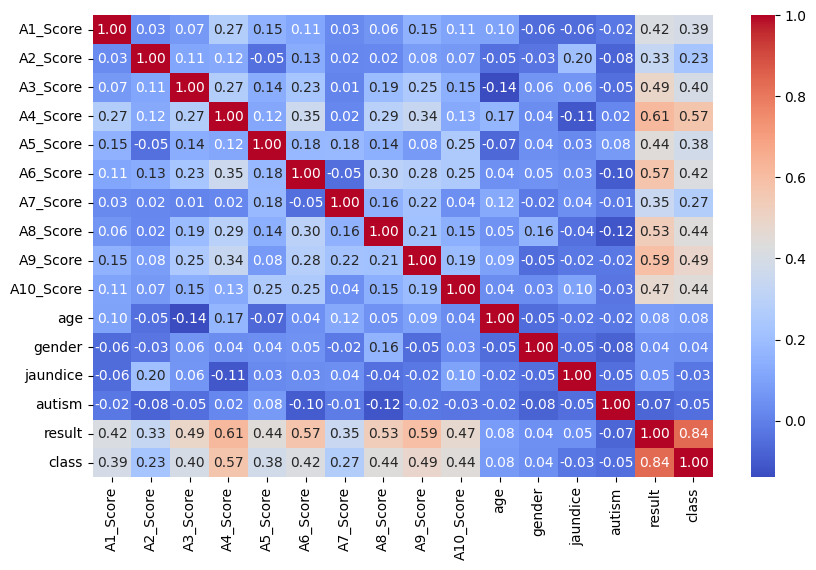

In [42]:
corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')


# Statistical Tests

Chi-Square Test

In [47]:
cols = ['gender','jaundice','autism'] + scores

for col in cols:
    table = pd.crosstab(df[col], df['class'])
    chi2, p, _, _ = chi2_contingency(table)
    print(col, "p =", p)

gender p = 0.5937859868520012
jaundice p = 0.7666554589836205
autism p = 0.4982744889440034
A1_Score p = 4.024320330924432e-11
A2_Score p = 0.00014673153113030655
A3_Score p = 3.4711480987885724e-11
A4_Score p = 8.243274986578091e-22
A5_Score p = 2.0572291158263306e-10
A6_Score p = 2.54170228444541e-12
A7_Score p = 5.0813469291090295e-06
A8_Score p = 1.6548079570980713e-13
A9_Score p = 2.602810185076454e-16
A10_Score p = 1.508122350283738e-13


T-Test

In [48]:
# Age vs Class
asd = df[df['class']==1]['age']
non_asd = df[df['class']==0]['age']

t, p = ttest_ind(asd, non_asd)

print("p-value:", p)

p-value: 0.19990189970915062


In [50]:
# Total Score vs Class
asd = df[df['class']==1]['result']
non_asd = df[df['class']==0]['result']

t, p = ttest_ind(asd, non_asd)

print("p-value", p)

p-value 1.61179229090253e-77


There is a highly significant difference in total screening scores between ASD and non-ASD groups (p < 0.001), with individuals diagnosed with ASD having substantially higher scores.

Mann-Whitney U Test

In [51]:
u, p = mannwhitneyu(asd, non_asd)
p

np.float64(4.354085850064172e-50)

In [7]:
df = df.drop(columns=['result'])
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,class
0,1,1,0,0,1,1,0,1,0,0,6,1,0,0,0
1,1,1,0,0,1,1,0,1,0,0,6,1,0,0,0
2,1,1,0,0,0,1,1,1,0,0,6,1,0,0,0
3,0,1,0,0,1,1,0,0,0,1,5,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,5,1,1,0,1


During exploration, a feature (result) was identified as a direct aggregation of screening responses used to determine the diagnosis. Including this feature caused data leakage and artificially perfect model performance. Therefore, it had to be removed.

In [8]:
df.to_pickle(r"C:\Users\HP\OneDrive\Documents\Data Professional\Machine Learning\Projects\ASD-prediction\ASD-cleaned")